## CNN을 활용한 말과 사람 이미지 분류

In [1]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
label = ["horse","human"]

train_X = []
train_Y = []
test_X = []
test_Y = []

classes = os.listdir("data")
data = []
for i, cls in enumerate(classes):
    # print(cls)
    files = os.listdir(f"data/{cls}")
    for f in files:
        # print(f)
        img = Image.open(f"data/{cls}/{f}")
        data.append((np.asarray(img), i))
        img.close()
random.shuffle(data)
# print(data)

In [3]:
for i in range(len(data)):
    if i < len(data) * 0.8:
        train_X.append(data[i][0]) # 이미지 데이터
        train_Y.append(data[i][1]) # 라벨 인덱스
    else:
        test_X.append(data[i][0])
        test_Y.append(data[i][1])

In [4]:
# 정규화 및 numpy 배열로 변환
train_X = np.array(train_X) / 255.0
test_X = np.array(test_X) / 255.0
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(822, 150, 150, 3) (822,) (205, 150, 150, 3) (205,)


In [5]:
# 모델 구성
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_X, train_Y, epochs=30, validation_data=(test_X, test_Y), callbacks=[early_stop])

model.summary()

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7616 - loss: 0.4854 - val_accuracy: 0.9024 - val_loss: 0.2372
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9088 - loss: 0.2318 - val_accuracy: 0.8634 - val_loss: 0.3269
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9331 - loss: 0.1728 - val_accuracy: 0.9463 - val_loss: 0.1301
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9501 - loss: 0.1317 - val_accuracy: 0.9756 - val_loss: 0.0665
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9781 - loss: 0.0658 - val_accuracy: 0.9854 - val_loss: 0.0388
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9805 - loss: 0.0497 - val_accuracy: 0.9805 - val_loss: 0.0561
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9964 - loss: 0.0168 - val_accuracy: 0.9951 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,784 (1.49 MB)

 Trainable params: 130,594 (510.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,190 (1020.28 KB)

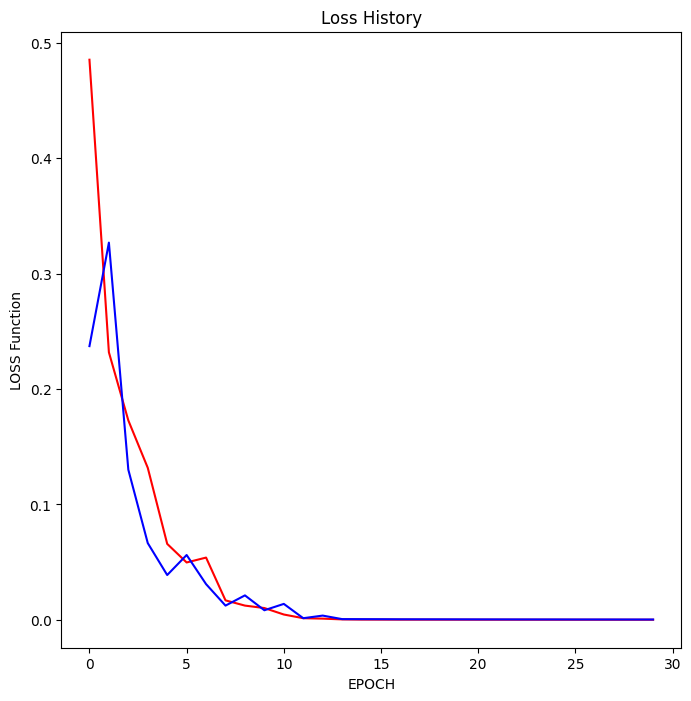

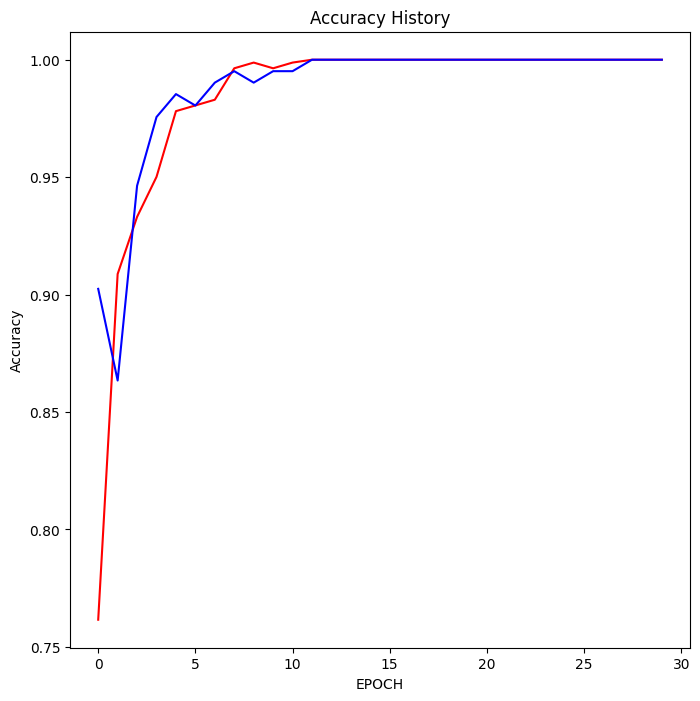

In [6]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


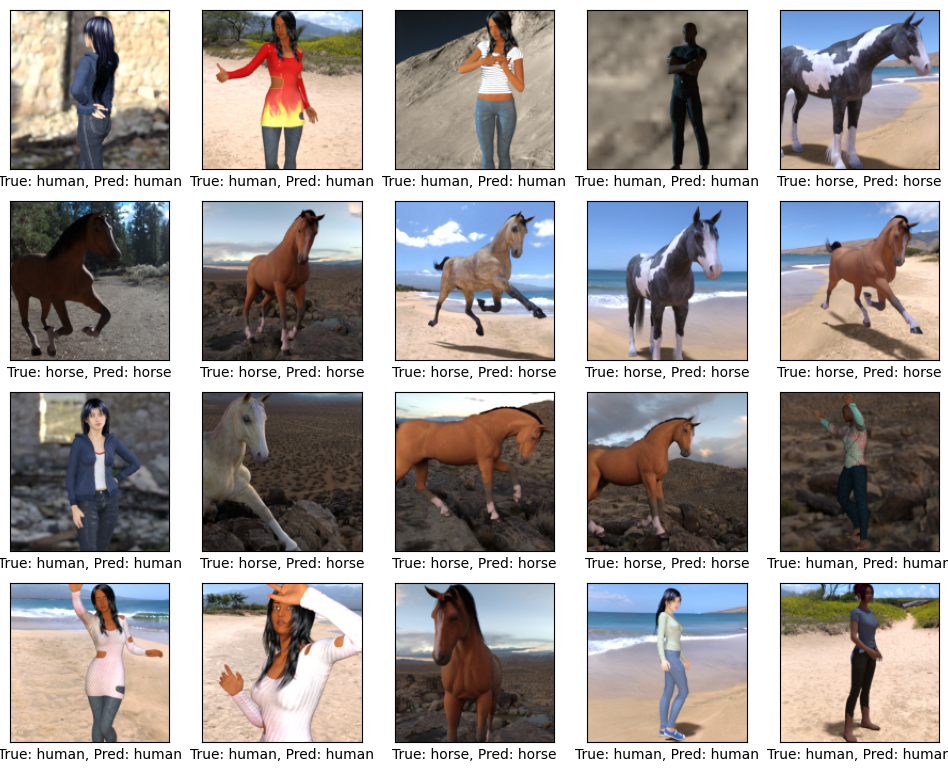

In [7]:
def show_predictions(model, num_images=20):
    
    indices = np.random.choice(len(test_X), num_images, replace=False)

    plt.figure(figsize=(12, 12))

    for i, idx in enumerate(indices):
        img = test_X[idx]
        true_label = test_Y[idx]

        pred_label = np.argmax(model.predict(np.expand_dims(img, axis=0)), axis=-1)[0]

        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(f'True: {label[true_label]}, Pred: {label[pred_label]}')

    plt.show()

show_predictions(model, num_images=20)